In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
df = pd.read_csv('mystery_data.csv')
df

,101,40,M,5.6,45
0,102,90,M,10.3,97
1,103,84,F,7.7,98
2,104,52,M,11.6,98
3,105,43,F,8.4,47
4,106,40,M,8.8,60
...,...,...,...,...,...
94,196,42,M,10.2,61
95,197,66,M,10.9,65
96,198,68,F,10.6,58
97,199,71,M,7.9,53


In [13]:
#adding column name according to values
#marks column are selected because their value is not greater than 100
df.columns = ['ID','Math','Gender','StudyHours','Science']
df

,ID,Math,Gender,StudyHours,Science
0,102,90,M,10.3,97
1,103,84,F,7.7,98
2,104,52,M,11.6,98
3,105,43,F,8.4,47
4,106,40,M,8.8,60
...,...,...,...,...,...
94,196,42,M,10.2,61
95,197,66,M,10.9,65
96,198,68,F,10.6,58
97,199,71,M,7.9,53


In [14]:
df = df.dropna(subset=['StudyHours'])
df

,ID,Math,Gender,StudyHours,Science
0,102,90,M,10.3,97
1,103,84,F,7.7,98
2,104,52,M,11.6,98
3,105,43,F,8.4,47
4,106,40,M,8.8,60
...,...,...,...,...,...
94,196,42,M,10.2,61
95,197,66,M,10.9,65
96,198,68,F,10.6,58
97,199,71,M,7.9,53


In [22]:
df['TotalScore'] = df['Math'] + df['Science']
df

/tmp/ipython-input-22-2685790858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalScore'] = df['Math'] + df['Science']


,ID,Math,Gender,StudyHours,Science,TotalScore
0,102,90,M,10.3,97,187
1,103,84,F,7.7,98,182
2,104,52,M,11.6,98,150
3,105,43,F,8.4,47,90
4,106,40,M,8.8,60,100
...,...,...,...,...,...,...
94,196,42,M,10.2,61,103
95,197,66,M,10.9,65,131
96,198,68,F,10.6,58,126
97,199,71,M,7.9,53,124


In [21]:
df.sort_values(by='TotalScore', ascending=False).head(5)

,ID,Math,Gender,StudyHours,Science,TotalScore
16,118,93,M,9.1,97,190
0,102,90,M,10.3,97,187
1,103,84,F,7.7,98,182
98,200,89,M,10.1,90,179
76,178,87,F,4.8,92,179


In [70]:
#sample data of students having 70 plus marks
sample_data = df[df['Math'] >= 70]

print(len(sample_data))

sample_data = sample_data.head(29)
print(len(sample_data))


46
29


In [75]:
mean = df['Math'].mean()
print(mean)
sample_mean = sample_data['Math'].mean()
print (sample_mean)
ttest,pvalue = scipy.stats.ttest_1samp(mean,sample_mean)
print(ttest,pvalue)


67.26530612244898
81.58620689655173
nan nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [63]:
if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


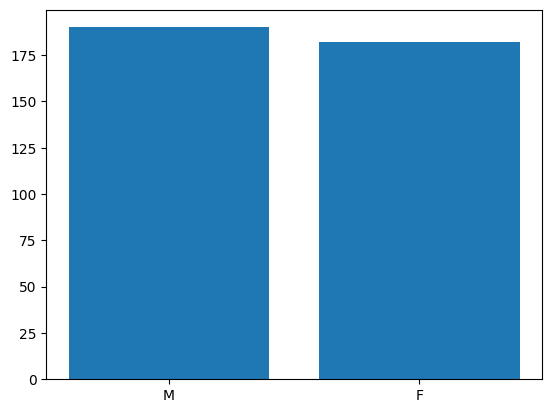

In [56]:
plt.bar(df['Gender'],df['TotalScore'])
plt.show()
# insight
# male have greater toatl mean score than female